## 2-1 결측치 처리

+ 0 등 상수로 대치
+ 대푯값으로 대치
+ 단순확률대치법
+ 시계열 데이터의 경우 보간법
+ 결측치가 극소수이거나 대다수인 경우, 데이터의 행이나 열을 삭제

결측치 확인

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action = 'ignore')

wine = pd.read_csv('./data/2-1_wine.csv', index_col= 0)
wine = wine[['Alcohol', 'Malicacid', 'Ash', 'Magnesium', 'Hue']]
wine.head()

,Alcohol,Malicacid,Ash,Magnesium,Hue
0,14.23,1.71,2.43,127,1.04
1,13.20,1.78,2.14,100,1.05
2,13.16,2.36,2.67,101,1.03
3,14.37,1.95,2.50,113,0.86
4,13.24,2.59,2.87,118,1.04


In [6]:
wine.isnull().sum()

Alcohol      0
Malicacid    0
Ash          0
Magnesium    0
Hue          0
dtype: int64

In [16]:
# 결측치가 없어 임의로 결측치 입력
from numpy.random import randint
wine_m = wine.copy()

for col in ['Ash', 'Alcohol']:
    random_idx = randint(0, len(wine), 25)
    wine_m.loc[random_idx, col] = np.nan

wine_m.isnull().sum()

Alcohol      23
Malicacid     0
Ash          22
Magnesium     0
Hue           0
dtype: int64

In [ ]:
# !pip install missingno

c:\Users\USER\anaconda3\lib\site-packages\missingno\missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(


Text(0, 0.5, '결측치 생성 데이터')

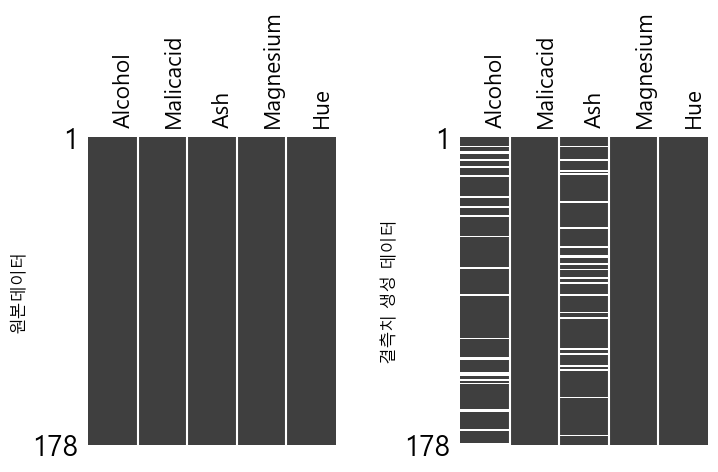

In [30]:
# plotting 환경 설정
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5,5) # 그래프 크기
plt.rcParams['font.family'] = 'Malgun Gothic' # 글꼴
plt.rcParams['font.size'] = 12 # 글꼴 크기
plt.rcParams['axes.unicode_minus'] = False # 마이너스 표기

fig, ax = plt.subplots(1,2,figsize = (8,4))
plt.subplots_adjust(wspace= 0.5)

import missingno as msno
msno.matrix(df = wine, figsize = (5,5), ax = ax[0], label_rotation= 90)
ax[0].set_ylabel('원본데이터')

msno.matrix(df = wine_m, figsize = (5,5), ax = ax[1], label_rotation= 90)
ax[1].set_ylabel('결측치 생성 데이터')

0 으로 대치 & 상수로 대치

In [32]:
# 대치 전 : wine_m
wine_m[['Alcohol', 'Ash']].head(10)

,Alcohol,Ash
0,14.23,2.43
1,13.20,2.14
2,13.16,2.67
3,14.37,2.50
4,13.24,2.87
5,NaN,NaN
6,14.39,2.45
7,14.06,2.61
8,NaN,2.17
9,NaN,2.27


In [35]:
# 0으로 대치
wine_imp = wine_m[['Alcohol', 'Ash']].fillna(0)
wine_imp[['Alcohol', 'Ash']].head(10)

,Alcohol,Ash
0,14.23,2.43
1,13.20,2.14
2,13.16,2.67
3,14.37,2.50
4,13.24,2.87
5,0.00,0.00
6,14.39,2.45
7,14.06,2.61
8,0.00,2.17
9,0.00,2.27


In [36]:
# 100으로 대치
wine_imp = wine_m[['Alcohol', 'Ash']].fillna(100)
wine_imp[['Alcohol', 'Ash']].head(10)

,Alcohol,Ash
0,14.23,2.43
1,13.20,2.14
2,13.16,2.67
3,14.37,2.50
4,13.24,2.87
5,100.00,100.00
6,14.39,2.45
7,14.06,2.61
8,100.00,2.17
9,100.00,2.27


대푯값으로 채우는 방법
> 평균값, 중앙값, 최빈값 등

In [37]:
# 대표값으로 채우기 전
wine_m[['Alcohol', 'Ash']].head(10)

,Alcohol,Ash
0,14.23,2.43
1,13.20,2.14
2,13.16,2.67
3,14.37,2.50
4,13.24,2.87
5,NaN,NaN
6,14.39,2.45
7,14.06,2.61
8,NaN,2.17
9,NaN,2.27


In [46]:
# 결측치를 대푯값 mean 으로 대치한 데이터
# wine_imp1 = wine_m[['Alcohol', 'Ash']].fillna(wine_m[['Alcohol', 'Ash']].mean)
wine_m[['Alcohol', 'Ash']].fillna(wine_m[['Alcohol', 'Ash']].mean()).head(10) # mean, median

,Alcohol,Ash
0,14.230000,2.430000
1,13.200000,2.140000
2,13.160000,2.670000
3,14.370000,2.500000
4,13.240000,2.870000
5,12.962387,2.371218
6,14.390000,2.450000
7,14.060000,2.610000
8,12.962387,2.170000
9,12.962387,2.270000


In [63]:
wine_m['Alcohol'].value_counts(ascending= False).index

Index([13.05, 12.37, 12.08, 12.29, 12.42, 13.88,  12.6, 14.22,  13.5, 13.49,
       ...
       13.86, 12.21, 13.34, 12.17, 13.67, 12.64, 13.72, 13.56, 13.74, 13.27],
      dtype='float64', name='Alcohol', length=113)

In [66]:
# 최빈값으로 바꾸기
# value_counts(ascending = False)로 내림차순 정렬하고 제일 큰 것으로 대치
wine_m['Alcohol'].fillna(wine_m['Alcohol'].value_counts(ascending= False).index[0]).head(10)
wine_m['Ash'].fillna(wine_m['Ash'].value_counts(ascending= False).index[0]).head(10)

0    2.43
1    2.14
2    2.67
3    2.50
4    2.87
5    2.30
6    2.45
7    2.61
8    2.17
9    2.27
Name: Ash, dtype: float64

단순확률대치법
- 유사한 데이터 셋에서 랜덤하게 샘플링한 값으로 대치하는 방법
- 다른 데이터셋을 사용하므로 ADP 에는 사용하지 않을듯?


다른 변수들로 모델링하여 결측값을 예측하는 방법

In [79]:
# KNNImputer로 결측치를 대치
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
wine_imp3 = imputer.fit_transform(wine_m)
wine_imp3 = pd.DataFrame(wine_imp3, columns= wine_m.columns)
wine_imp3.head(10)

,Alcohol,Malicacid,Ash,Magnesium,Hue
0,14.230000,1.71,2.43,127.0,1.04
1,13.200000,1.78,2.14,100.0,1.05
2,13.160000,2.36,2.67,101.0,1.03
3,14.370000,1.95,2.50,113.0,0.86
4,13.240000,2.59,2.87,118.0,1.04
5,13.940000,1.76,2.56,112.0,1.05
6,14.390000,1.87,2.45,96.0,1.02
7,14.060000,2.15,2.61,121.0,1.06
8,13.056667,1.64,2.17,97.0,1.08
9,12.830000,1.35,2.27,98.0,1.01


In [80]:
wine_imp3.isnull().sum()

Alcohol      0
Malicacid    0
Ash          0
Magnesium    0
Hue          0
dtype: int64

보간법
> 선형보간법, 다항식보간법, 스플라인보간법

In [92]:
# 선형보간법으로 결측치를 대치
# zero, slinear, quadratic, cubic 0,1,2,3차
wine_imp4 = wine_m.interpolate(method = 'linear') 
wine_imp4.head(10)

,Alcohol,Malicacid,Ash,Magnesium,Hue
0,14.230000,1.71,2.43,127,1.04
1,13.200000,1.78,2.14,100,1.05
2,13.160000,2.36,2.67,101,1.03
3,14.370000,1.95,2.50,113,0.86
4,13.240000,2.59,2.87,118,1.04
5,13.815000,1.76,2.66,112,1.05
6,14.390000,1.87,2.45,96,1.02
7,14.060000,2.15,2.61,121,1.06
8,14.073333,1.64,2.17,97,1.08
9,14.086667,1.35,2.27,98,1.01


In [84]:
wine_imp4.isnull().sum()

Alcohol      0
Malicacid    0
Ash          0
Magnesium    0
Hue          0
dtype: int64

## 2-2 이상치 처리

1. ESD(Extreme studentized deviation)
    + 평균 - 3*표준편차 < normal data < 평균 + 3*표준편차
2. 기하평균 - 2.5*표준편차 < normal data < 기하평균 + 2.5*표준편차
3. Q1 - 1.5*IQR < normal data < Q3 + 1.5*IQR
4. 군집 분석을 통한 이상치 진단 : DBSCAN 군집 분석을 통해 -1로 분류되는 값을 이상치로 진단

In [16]:
wine = pd.read_csv('./data/2-1_wine.csv', index_col = 0)
wine = wine[['Alcohol','Malicacid', 'Ash', 'Magnesium', 'Hue']]
wine.head()

,Alcohol,Malicacid,Ash,Magnesium,Hue
0,14.23,1.71,2.43,127,1.04
1,13.20,1.78,2.14,100,1.05
2,13.16,2.36,2.67,101,1.03
3,14.37,1.95,2.50,113,0.86
4,13.24,2.59,2.87,118,1.04


In [17]:
# Malicacid 변수 이상치 찾기
IQR = wine.Malicacid.quantile(0.75) - wine.Malicacid.quantile(0.25)
top = wine.Malicacid.quantile(0.75) + IQR * 1.5
bottom = wine.Malicacid.quantile(0.25) - IQR * 1.5

# 상한보다 크고 하한보다 작은 데이터 찾기
out_id = wine[(wine.Malicacid >= top) | (wine.Malicacid <= bottom)].index
out_id

Index([123, 137, 173], dtype='int64')

절단

In [4]:
prep_df = wine[['Malicacid']].drop(out_id, axis = 0)

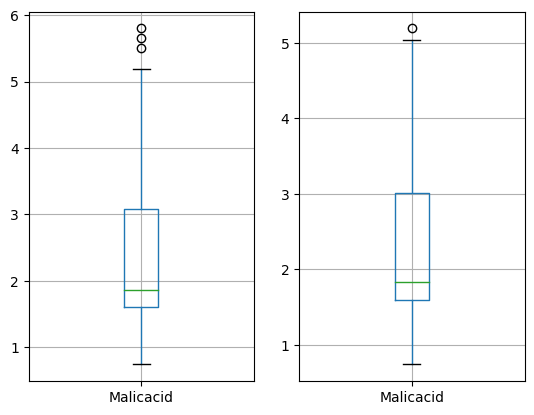

In [7]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2)
for data, ax in zip([wine[['Malicacid']], prep_df], axes):
    data.boxplot(ax = ax)

plt.show()

조정
+ 이상치를 상한과 하한값으로 보정

In [14]:
prep_df2 = wine[['Malicacid']].clip(bottom, top) # clip(min, max) 상한, 하한의 밖의 값을 상한과 하한으로 대치

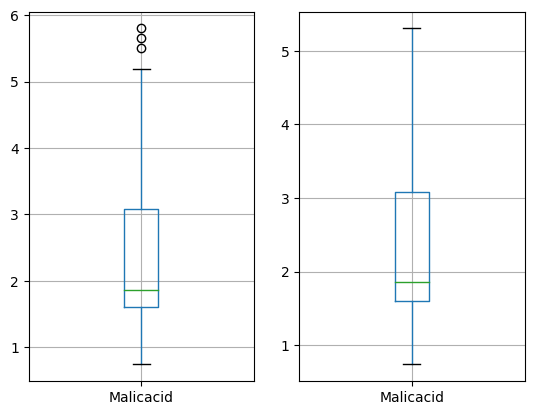

In [13]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2)
for data, ax in zip([wine[['Malicacid']], prep_df2], axes):
    data.boxplot(ax = ax)

plt.show()

클리핑
+ 이상치의 상한과 하한을 특정값으로 지정해서 해당값으로 조정
+ 이상치에 대한 확실한 정보를 가지고 있을 때

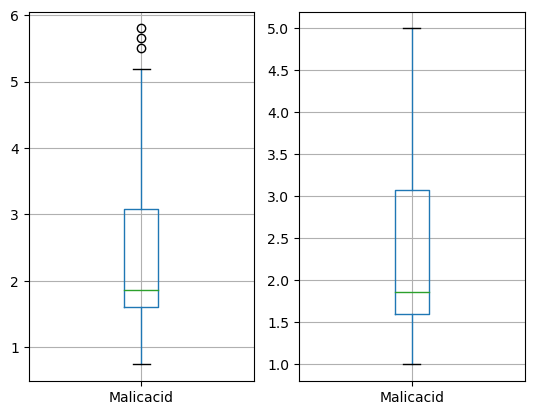

In [15]:
# 클리핑
prep_df3 = wine[['Malicacid']].clip(1, 5)

import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2)
for data, ax in zip([wine[['Malicacid']], prep_df3], axes):
    data.boxplot(ax = ax)

plt.show()

## 2-3 클래스 불균형 처리
+ 오버샘플링 : RandomOverSampler, SMOTE 등
+ 언더샘플링 : RandomUnderSampler 등

실제 데이터들은 클래스가 불균형한 경향이 있는데, 소수 클래스의 데이터 수가 부족한 경우가 많으므로 주로 오버샘플링을 실시함

In [40]:
# 클래스 분균형 데이터 생성
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from collections import Counter

data = load_breast_cancer()
df = pd.DataFrame(np.c_[data.data, data.target], columns = list(data.feature_names) + ['target'])

# 3개의 feature와 target 추출
df = df[['mean radius', 'mean texture', 'mean area', 'target']]
print(df.head(3))
print('original data class 분포 \n', df.target.value_counts())

# 클래스 불균형한 imb_df 생성
df1 = df[df.target == 0].sample(50)
df2 = df[df.target == 1].sample(250)

imb_df = pd.concat([df1, df2]).reset_index(drop = True)
print('imbalanced data class 분포 \n',imb_df.target.value_counts())

features = imb_df.drop('target', axis = 1)
target = imb_df.target

   mean radius  mean texture  mean area  target
0        17.99         10.38     1001.0     0.0
1        20.57         17.77     1326.0     0.0
2        19.69         21.25     1203.0     0.0
original data class 분포 
 target
1.0    357
0.0    212
Name: count, dtype: int64
imbalanced data class 분포 
 target
1.0    250
0.0     50
Name: count, dtype: int64


랜덤오버샘플링
+ 소수 클래스를 단순 복제하여 균형을 맞춰주는 것
+ 동일한 데이터의 개수가 늘어난 것으로 과적합의 위험이 있음

imbalance data class 분포 
 target
1.0    250
0.0     50
Name: count, dtype: int64
oversampled data class 분포 
 target
0.0    250
1.0    250
Name: count, dtype: int64


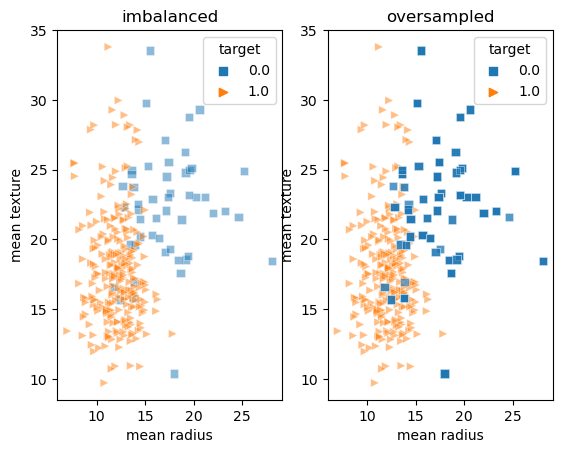

In [66]:
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(random_state=0)
bal_features, bal_target = os.fit_resample(features, target)
print('imbalance data class 분포 \n', target.value_counts())
print('oversampled data class 분포 \n', bal_target.value_counts())

import seaborn as sns
over_df1 = pd.DataFrame(np.c_[bal_features, bal_target], columns = imb_df.columns)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2)
sns.scatterplot(x = 'mean radius', y = 'mean texture', hue='target', data = imb_df, ax = ax[0],
                alpha = 0.5, style = 'target', markers= ['s', '>'])
ax[0].set_title('imbalanced')

sns.scatterplot(x = 'mean radius', y = 'mean texture', hue='target', data = over_df1, ax = ax[1],
                alpha = 0.5, style = 'target', markers= ['s', '>'])
ax[1].set_title('oversampled')
plt.show()

SMOTE
+ 임의의 소수 클래스 데이터로 부터 인근 소수 클래스 사이에 새로운 데이터를 생성

imbalance data class 분포 
 target
1.0    250
0.0     50
Name: count, dtype: int64
oversampled data class 분포 
 target
0.0    250
1.0    250
Name: count, dtype: int64


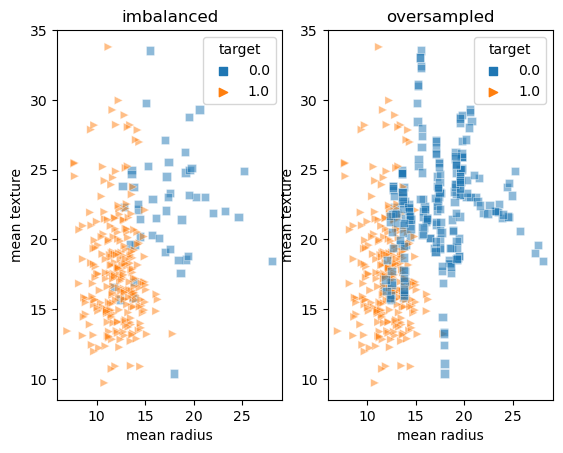

In [68]:
from imblearn.over_sampling import SMOTE
os = SMOTE(k_neighbors= 3, random_state= 0)
bal_features, bal_target = os.fit_resample(features, target)
print('imbalance data class 분포 \n', target.value_counts())
print('oversampled data class 분포 \n', bal_target.value_counts())

import seaborn as sns
over_df2 = pd.DataFrame(np.c_[bal_features, bal_target], columns = imb_df.columns)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2)
sns.scatterplot(x = 'mean radius', y = 'mean texture', hue='target', data = imb_df, ax = ax[0],
                alpha = 0.5, style = 'target', markers= ['s', '>'])
ax[0].set_title('imbalanced')

sns.scatterplot(x = 'mean radius', y = 'mean texture', hue='target', data = over_df2, ax = ax[1],
                alpha = 0.5, style = 'target', markers= ['s', '>'])
ax[1].set_title('oversampled')
plt.show()

> 같은 방식으로 BorderlineSMOTE, KMeansSMOTE, SVMSMOTE, ADASYN 의 SMOTE 오버샘플링 방법이 있음

imbalance data class 분포 
 target
1.0    250
0.0     50
Name: count, dtype: int64
oversampled data class 분포 
 target
0.0    252
1.0    250
Name: count, dtype: int64


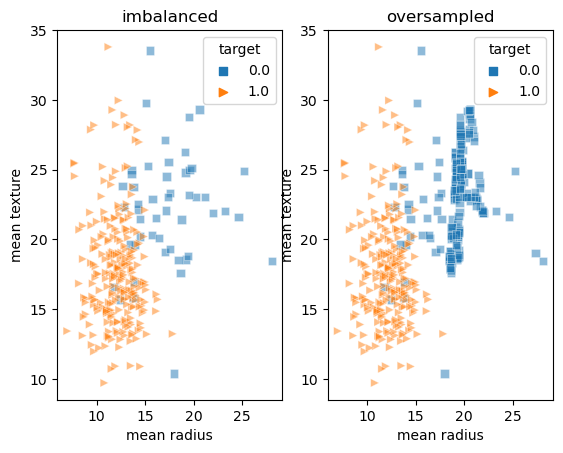

In [75]:
from imblearn.over_sampling import KMeansSMOTE
os = KMeansSMOTE(k_neighbors= 3, random_state= 0)
bal_features, bal_target = os.fit_resample(features, target)
print('imbalance data class 분포 \n', target.value_counts())
print('oversampled data class 분포 \n', bal_target.value_counts())

import seaborn as sns
over_df3 = pd.DataFrame(np.c_[bal_features, bal_target], columns = imb_df.columns)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2)
sns.scatterplot(x = 'mean radius', y = 'mean texture', hue='target', data = imb_df, ax = ax[0],
                alpha = 0.5, style = 'target', markers= ['s', '>'])
ax[0].set_title('imbalanced')

sns.scatterplot(x = 'mean radius', y = 'mean texture', hue='target', data = over_df3, ax = ax[1],
                alpha = 0.5, style = 'target', markers= ['s', '>'])
ax[1].set_title('oversampled')
plt.show()

오버샘플링된 데이터로 분류 학습 및 결과 비교

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score

data = [imb_df, over_df1, over_df2, over_df3]
data_title = ['no oversampled', 'RandomOverSampler', 'SMOTE', 'KMeansSMOTE']

scores = pd.DataFrame(index = ['train acc', 'test acc', 'f1 score', 'roc_auc score'], columns = data_title)

for df, title in zip(data, data_title):
    X = df.drop('target', axis = 1)
    y = df.target

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    scores.loc['train acc', title] = lr.score(X_train, y_train)
    scores.loc['test acc', title] = lr.score(X_test, y_test)
    scores.loc['f1 score', title] = f1_score(y_test, y_pred)
    scores.loc['roc_auc score', title] = roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])

scores
# KMeansSMOTE 가 가장 좋다

,no oversampled,RandomOverSampler,SMOTE,KMeansSMOTE
train acc,0.937778,0.906667,0.874667,0.957447
test acc,0.92,0.904,0.848,0.97619
f1 score,0.951613,0.892857,0.837607,0.97479
roc_auc score,0.961538,0.959572,0.945749,0.998482


## 2-4 변수변환

+ 신경망 모델, 거리기반 모델 : 반드시 스케일링이 필요
+ 트리 기반 모델 : 스케일링이 필수는 아님

### 2.4.1 수치형 변수변환

- 선형변환 : MinMaxScaling, StandardScaling, Robust Scaling, Quantile Scaling
- 비선형변환 : 로그변환, Box-cox, Yeo-Johnson 등